In [ ]:
# carte de l'australie avec les emplacements des stations
# météorologiques et les prévisions météorologiques relatives

In [1]:
import folium
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df_villes=pd.read_csv('AUSLONLAT.csv',sep=';')

In [3]:
villesref=pd.read_csv("VilleRef.csv",sep=";")

In [4]:
villesref.rename(columns = {'Ville':'city'}, inplace = True)
#villesref

In [5]:
australian_clean=pd.read_csv("WeatherAUSFinal.csv",sep=";")
australian_clean.head(5)
a_clean_f = australian_clean[australian_clean['Date']=='2017-05-12']

In [6]:
lista = []
for i in range (0,a_clean_f.shape[0]):
    lista.append(i)

a_clean_f.set_index([lista])

a_clean_f.replace('No', 0, inplace=True)
a_clean_f.replace('Yes', 1, inplace=True)
a_clean_f.head(5)
a_clean_f.set_index([lista], inplace=True)
a_clean_f.tail(5)

/Users/bernardinotirri/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,RainToday,RainTomorrow,year,month,day,week
42,2017-05-12,Walpole,6.7,18.3,0.6,3.2,9.1,NE,20.0,100.0,57.0,1021.5,1018.9,0,0,2017,5,12,19
43,2017-05-12,Hobart,7.8,11.4,0.2,1.0,0.2,NNW,19.0,78.0,77.0,1027.7,1024.7,0,1,2017,5,12,19
44,2017-05-12,AliceSprings,3.1,27.3,0.0,7.4,10.9,N,28.0,18.0,11.0,1020.0,1014.9,0,0,2017,5,12,19
45,2017-05-12,Darwin,21.4,32.4,0.0,7.4,10.9,ENE,30.0,47.0,43.0,1012.8,1009.2,0,0,2017,5,12,19
46,2017-05-12,Uluru,5.6,27.0,0.0,7.4,10.9,NNW,28.0,31.0,17.0,1018.8,1014.5,0,0,2017,5,12,19


In [7]:
a_clean_f.rename(columns = {'Location':'city'}, inplace = True)
df_cd = pd.merge(a_clean_f, villesref, how='inner')
df_cd_1 = pd.merge(df_cd, df_villes)
df_cd_1.head(5)

/Users/bernardinotirri/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Date,city,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,Humidity9am,...,Pressure3pm,RainToday,RainTomorrow,year,month,day,week,Radar,lat,lng
0,2017-05-12,Albury,4.2,16.4,0.0,2.6,1.7,ESE,17.0,100.0,...,1024.0,0,0,2017,5,12,19,SydneyAirport,-36.0806,146.9158
1,2017-05-12,BadgerysCreek,8.5,19.8,0.0,2.6,1.7,SW,20.0,80.0,...,1024.5,0,0,2017,5,12,19,SydneyAirport,-33.8797222222,150.7522222222
2,2017-05-12,Cobar,7.5,21.8,0.0,2.6,1.7,NE,22.0,49.0,...,1020.8,0,0,2017,5,12,19,SydneyAirport,-31.4997,145.8319
3,2017-05-12,CoffsHarbour,15.9,22.6,0.1,3.2,5.7,SSW,37.0,68.0,...,1023.1,0,1,2017,5,12,19,Brisbane,-30.298612,153.109392
4,2017-05-12,Moree,8.2,24.8,0.0,2.6,1.7,E,30.0,53.0,...,1020.9,0,0,2017,5,12,19,SydneyAirport,-29.4650,149.8344


In [8]:
df_villes_ref={}
for idx,lige in villesref.iterrows():
    df_villes_ref[lige['city']]= lige['Radar']
#df_villes_ref


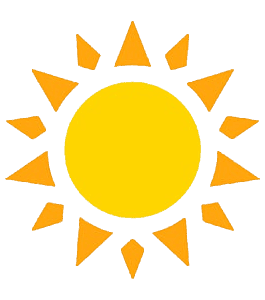
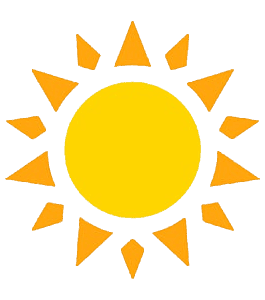
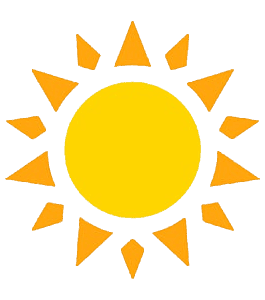
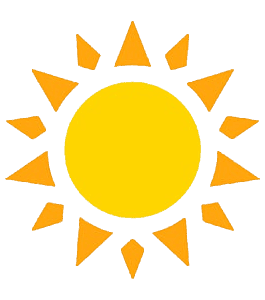
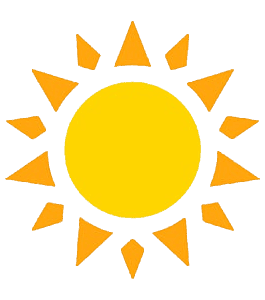
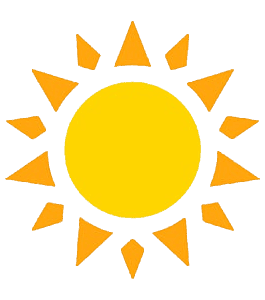
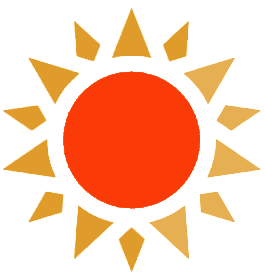
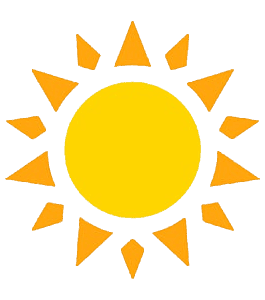
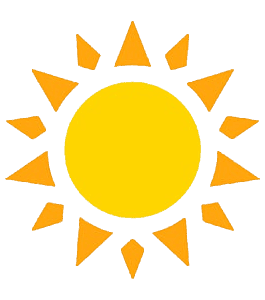
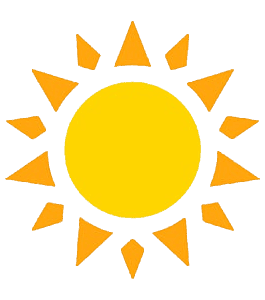
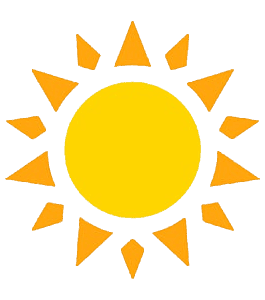
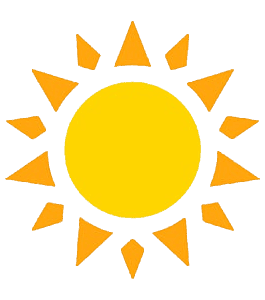
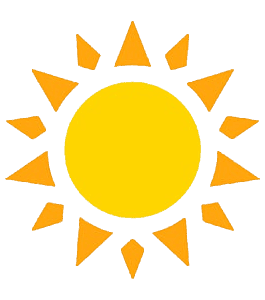
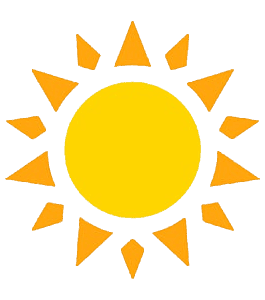
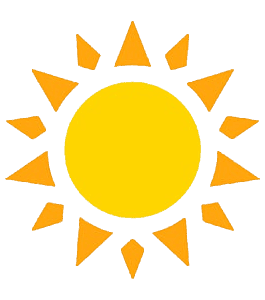
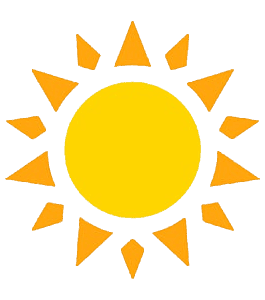
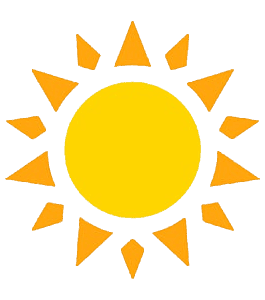
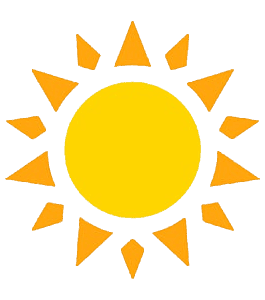
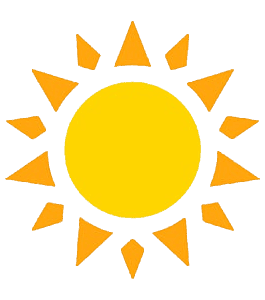
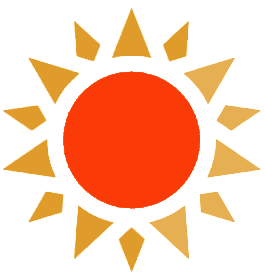
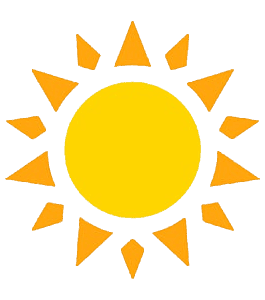
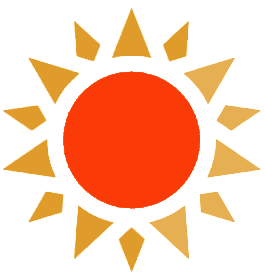
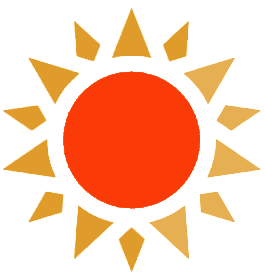
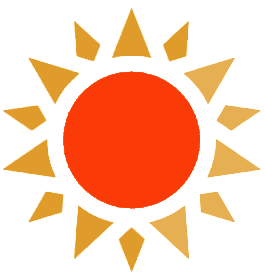
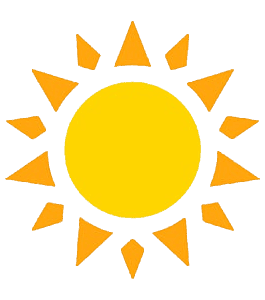
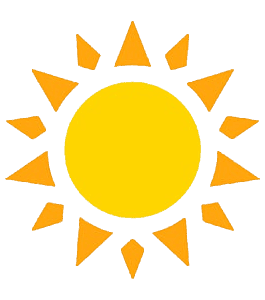
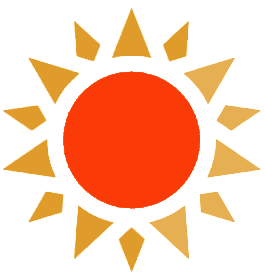
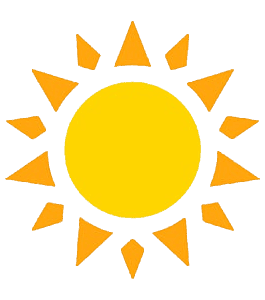
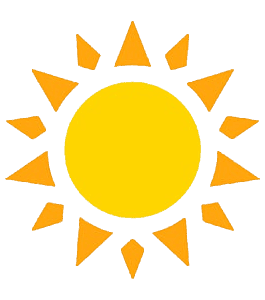
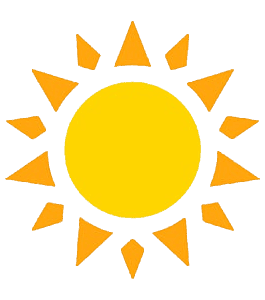
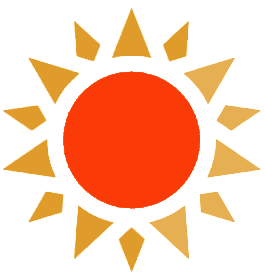
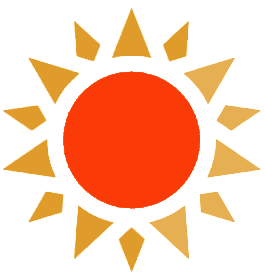
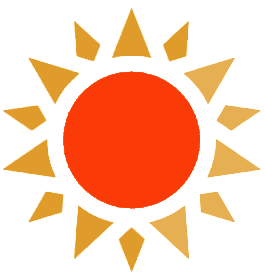
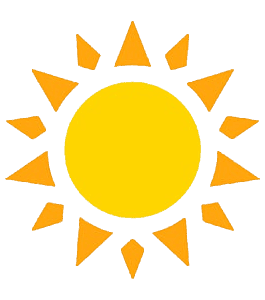
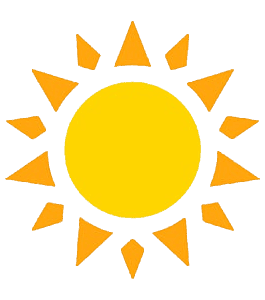
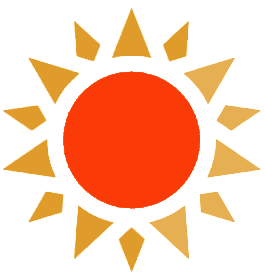

In [9]:
m=folium.Map(location=[df_cd_1[df_cd_1['city']=='Sydney']['lat'],
                       df_cd_1[df_cd_1['city']=='Sydney']['lng']],
             zoom_start=5)
url="/Users/bernardinotirri/Desktop/bernardino_codes/{}".format
urlimage=url("IconSun.png")
urlimageradar=url("IconSun2.png")


for index, row in df_cd_1.iterrows():
    
    if df_villes_ref[row['city']]=='isole':
        colradar='red'
        pos=folium.features.CustomIcon(urlimageradar,icon_size=(30,30))
    else:
        colradar='blue'
        pos=folium.features.CustomIcon(urlimage,icon_size=(30,30))
    if row['RainTomorrow'] == 1:
        Libelle=" il pleuvra"
        popup="<h2>"+row['city']+"</h2><p>demain"+ Libelle+"</p>"
        marker=folium.Marker(location=[row['lat'], row['lng']],popup=popup,tooltip=row['city'],icon=folium.Icon(icon='tint',icon_color='blue',color=colradar))
        marker.add_to(m)
    else:
        Libelle=" il ne pleuvra pas"
        popup="<h2>"+row['city']+"</h2><p>demain"+ Libelle+"</p>"
        marker=folium.Marker(location=[row['lat'], row['lng']],popup=popup,tooltip=row['city'],icon=pos)
        marker.add_to(m)

m


In [ ]:
###### Résultat de la prévision NSW

In [10]:
result_NSW = pd.read_csv("resultofNSW.csv",sep=";")

In [11]:
datacopy = australian_clean.copy()

In [12]:
datacopy.index.name='number_row'
datacopy.reset_index(inplace=True)

In [13]:
result_NSW.rename(columns = {'RainTomorrow':'RainTomorrowPred'}, inplace = True)

In [14]:
df_result = result_NSW[['number_row', 'RainTomorrowPred']].copy()
df_result.head()

,number_row,RainTomorrowPred
0,35908,0
1,33130,1
2,13720,0
3,48341,0
4,46710,0


In [15]:
datacopy.rename(columns = {'Location':'city'}, inplace = True)
df_result_1 = datacopy.merge( right=df_result, on='number_row', how='inner')
df_result_2 = df_result_1[df_result_1['Date']=='2017-05-12']
df_result_3 = pd.merge(df_result_2, df_villes)
df_result_4 = pd.merge(df_result_3, villesref)


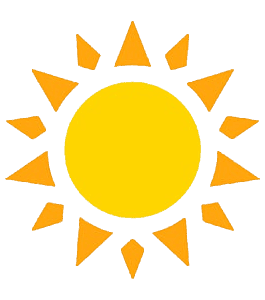
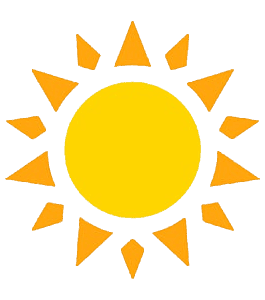
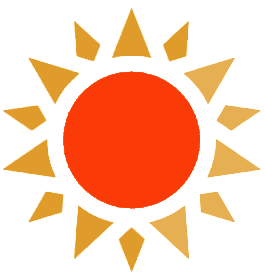

In [16]:
m=folium.Map(location=[df_cd_1[df_cd_1['city']=='Sydney']['lat'],
                       df_cd_1[df_cd_1['city']=='Sydney']['lng']],
             zoom_start=5)

url="/Users/bernardinotirri/Desktop/bernardino_codes/{}".format
urlimage=url("IconSun.png")
urlimageradar=url("IconSun2.png")


for index, row in df_result_4.iterrows():
    
    if df_villes_ref[row['city']]=='isole':
        colradar='red'
        pos=folium.features.CustomIcon(urlimageradar,icon_size=(30,30))
    else:
        colradar='blue'
        pos=folium.features.CustomIcon(urlimage,icon_size=(30,30))
    if row['RainTomorrowPred'] == 1:
        Libelle=" il pleuvra"
        popup="<h2>"+row['city']+"</h2><p>demain"+ Libelle+"</p>"
        marker=folium.Marker(location=[row['lat'], row['lng']],popup=popup,tooltip=row['city'],icon=folium.Icon(icon='tint',icon_color='blue',color=colradar))
        marker.add_to(m)
    else:
        Libelle=" il ne pleuvra pas"
        popup="<h2>"+row['city']+"</h2><p>demain"+ Libelle+"</p>"
        marker=folium.Marker(location=[row['lat'], row['lng']],popup=popup,tooltip=row['city'],icon=pos)
        marker.add_to(m)

m

